###Visualizacion de asistencia de diputados en la Asamblea Legislativa
Inicialmente consideré trabajar las visualizaciones PowerBI. Sin embargo, las posibilidades de análisis exploratorios que nos ofrece Python, influyeron en mi decisión final. Conceptos de análisis básico como ponderaciones, consultas estadísticas y visualizaciones personalizadas son determinantes a la hora de escoger visualizar datos con un lenguaje como Python o R o un software empaquetado como PowerBI o Tableau.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.style

In [ ]:
df = pd.read_csv('Control_Asistencia__20182020.csv', sep=",", encoding="latin-1") 

In [ ]:
df.describe()

In [ ]:
df.head(10)

###Procedemos a inspeccionar los datos. 
Entre los puntos a conocer están: Los promedios de ausencias, ausencias justificadas, ausencias injustificadas y plenarios totales.

In [ ]:
df.columns

Index(['Mes', 'Año', 'Nomb', 'Frac', 'Total', 'Asistencia', 'Ausencias',
       'Ausencias Permitidas', 'Sesiones No Realizadas', 'Pl Asist',
       'Pl Progr', 'Pl Aus', 'Pl Perm', 'Plenas Asist', 'Plenas  Prog',
       'Plenas Aus', 'Plenas Perm', 'CP Asist', 'CP Prog', 'CP Aus', 'CP Perm',
       'CPE Asist', 'CPE Prog', 'CPE Aus', 'CPE  Perm', 'CE Prog', 'CE Aus',
       'Frac Asist', 'Frac Prog', 'Frac  Aus', 'Frac  Perm', 'Jef. Frac Perm',
       'Jef. Frac Prog', 'Jef. Frac Aus'],
      dtype='object')

  Conociendo la media de plenarios a los que asisten las diferentes fraciones

In [ ]:
df_frac_total = df.groupby('Frac')['Total'].mean()
df_frac_total = pd.DataFrame(df_frac_total)
df_frac_total

,Total
Frac,
DI,29.722222
FFA,39.000000
IND,34.645833
PAC,39.450000
PFA,36.500000
PIN,35.628205
PLN,36.196833
PRN,34.592593
PRSC,36.096154


In [ ]:
diputados_por_fraccion_groupby = df.groupby('Frac')['Nomb'].count()
diputados_por_fraccion = pd.DataFrame(diputados_por_fraccion_groupby)
num_diputados = [1,2,4,9,9,10,14,17]
fraccion = ['RN','PLN','PUSC','PAC','PIN','PRSC','DI','FA']

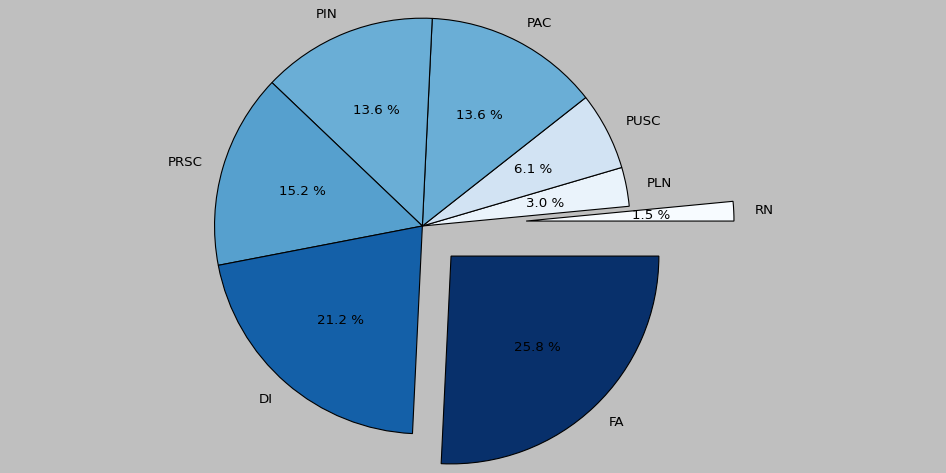

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
normdata = colors.Normalize(min(num_diputados), max(num_diputados))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(num_diputados))
desfase = (0.5,0, 0, 0,0,0,0,0.2)
plt.pie(num_diputados, labels=fraccion, autopct="%0.01f %%", colors=colores,explode=desfase)
plt.axis("equal")
plt.style.use('classic')
plt.show()

Datos generales de asitencia de diputados

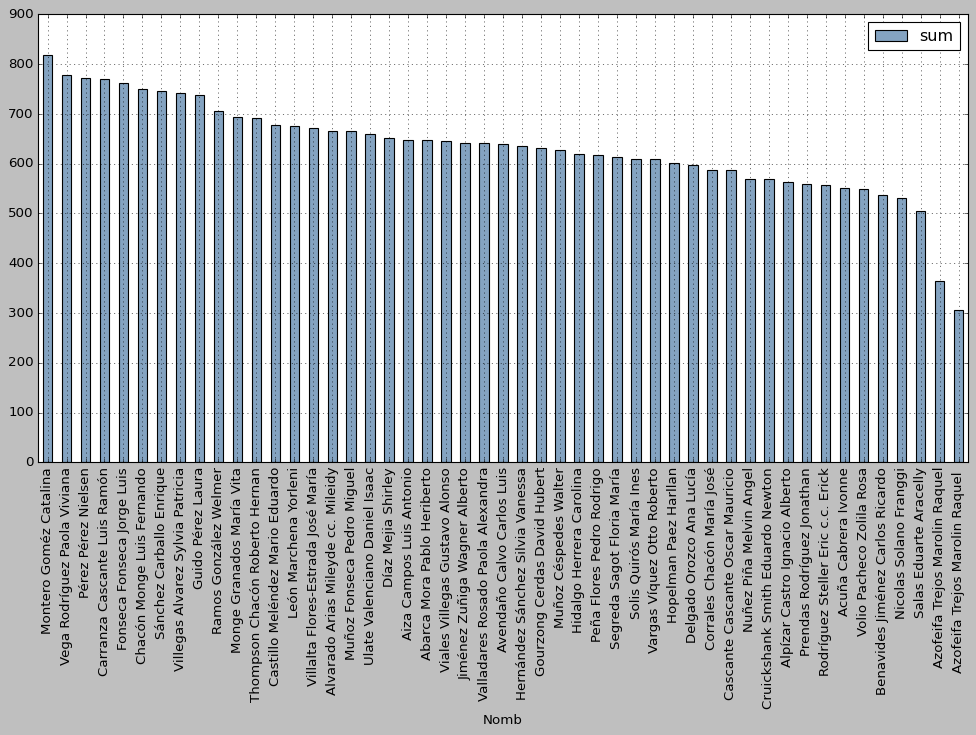

In [ ]:
df_nomb_total1 = df.groupby('Nomb')['Asistencia'].agg([sum]).drop_duplicates()
df_nomb_total = pd.DataFrame(df_nomb_total1.sort_values('sum', ascending=False))
plt.style.use('classic')
df_nomb_total.plot.bar(color=(0.2, 0.4, 0.6, 0.6),figsize=(15,7))
plt.grid(axis='both')
plt.show()

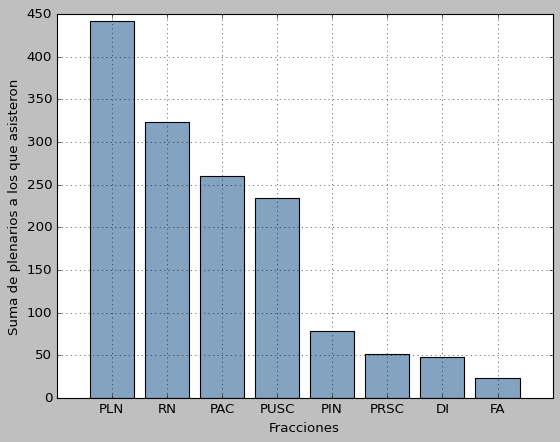

In [ ]:
height = [442,324,260,234,78,52,48,24]
bars = ('PLN','RN','PAC','PUSC','PIN','PRSC','DI','FA')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6)))
plt.grid(axis='both')
plt.xlabel('Fracciones')
plt.ylabel('Suma de plenarios a los que asisteron')
plt.xticks(y_pos, bars)
plt.show()


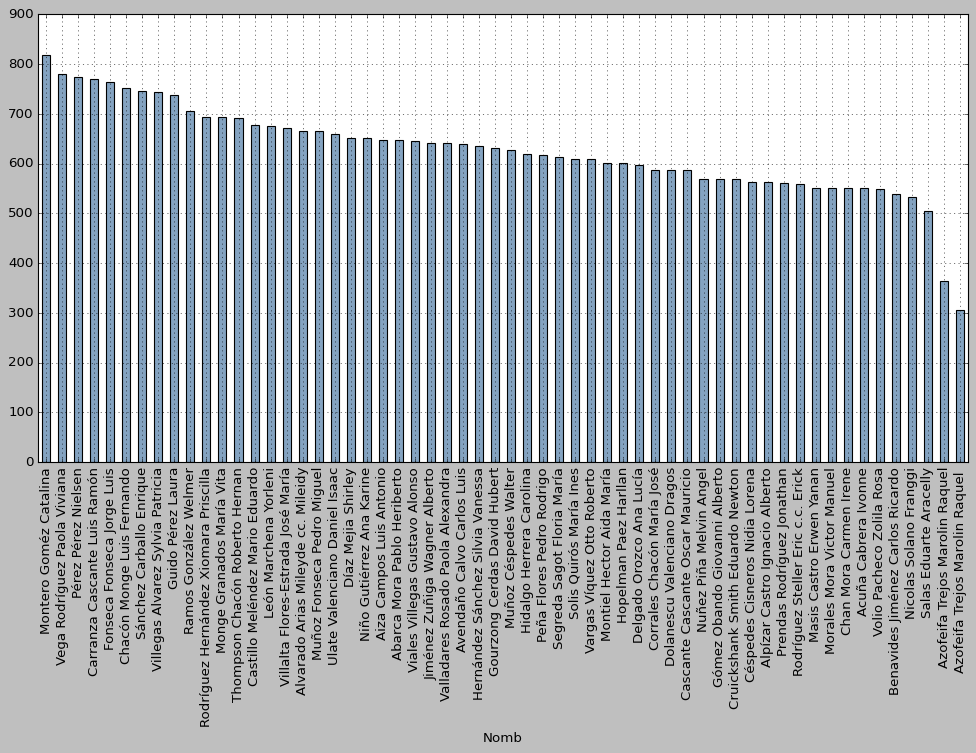

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
totales = df.sort_values("Total", ascending=False)
totales.groupby('Nomb')['Asistencia'].sum().sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.grid(axis='both')
plt.style.use('classic')
plt.show()

In [ ]:
df.groupby(['Mes'])['Asistencia'].mean()

Mes
1     20.412281
2     25.850877
3     22.561404
4     15.543860
5     22.058480
6     28.918129
7     24.543860
8     25.192982
9     30.192982
10    33.377193
11    28.350877
12    16.149123
Name: Asistencia, dtype: float64

###Visualizacion lineas de tiempo

In [ ]:
df.groupby('Año')['Ausencias'].sum()

Año
2018     461
2019    1043
2020     493
Name: Ausencias, dtype: int64

In [ ]:
df.groupby('Año')['Ausencias Permitidas'].sum()

Año
2018    1259
2019    2375
2020     909
Name: Ausencias Permitidas, dtype: int64

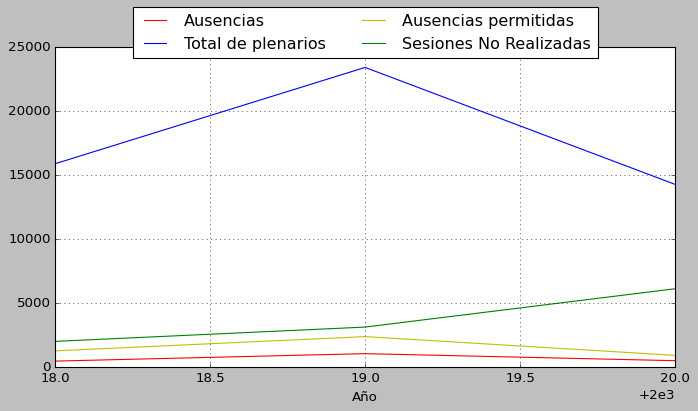

In [ ]:
fig, ax = plt.subplots() 
df.groupby('Año')['Ausencias'].sum().plot(label='Ausencias',color="r")
df.groupby('Año')['Total'].sum().plot(label='Total de plenarios',color="b")
df.groupby('Año')['Ausencias Permitidas'].sum().plot(label='Ausencias permitidas',color="y")
df.groupby('Año')['Sesiones No Realizadas'].sum().plot(label='Sesiones No Realizadas',color="g")

plt.style.use('classic')
plt.grid(axis='both')
plt.rcParams["figure.figsize"] = (10, 5)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

In [ ]:
df.groupby('Mes')['Ausencias'].sum()

Mes
1     107
2     146
3     111
4      42
5      55
6     444
7     149
8     126
9     151
10    271
11    252
12    143
Name: Ausencias, dtype: int64

In [ ]:
df.groupby('Mes')['Ausencias Permitidas'].sum()

Mes
1     355
2     362
3     406
4     245
5     313
6     542
7     417
8     391
9     401
10    465
11    411
12    235
Name: Ausencias Permitidas, dtype: int64

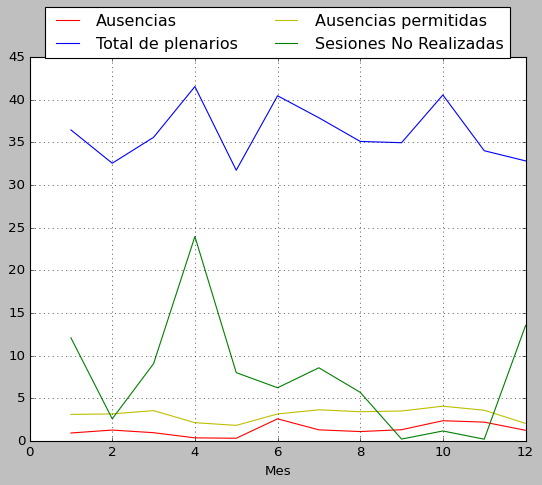

In [ ]:
fig, ax = plt.subplots() 
df.groupby('Mes')['Ausencias'].mean().plot(label='Ausencias',color="r")
df.groupby('Mes')['Total'].mean().plot(label='Total de plenarios',color="b")
df.groupby('Mes')['Ausencias Permitidas'].mean().plot(label='Ausencias permitidas',color="y")
df.groupby('Mes')['Sesiones No Realizadas'].mean().plot(label='Sesiones No Realizadas',color="g")

plt.style.use('classic')
plt.grid(axis='both')
plt.rcParams["figure.figsize"] = (10, 5)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

###Cuales son el total de plenarios a los que deben asistir las diferentes fracciones 

### Asistencia del PAC

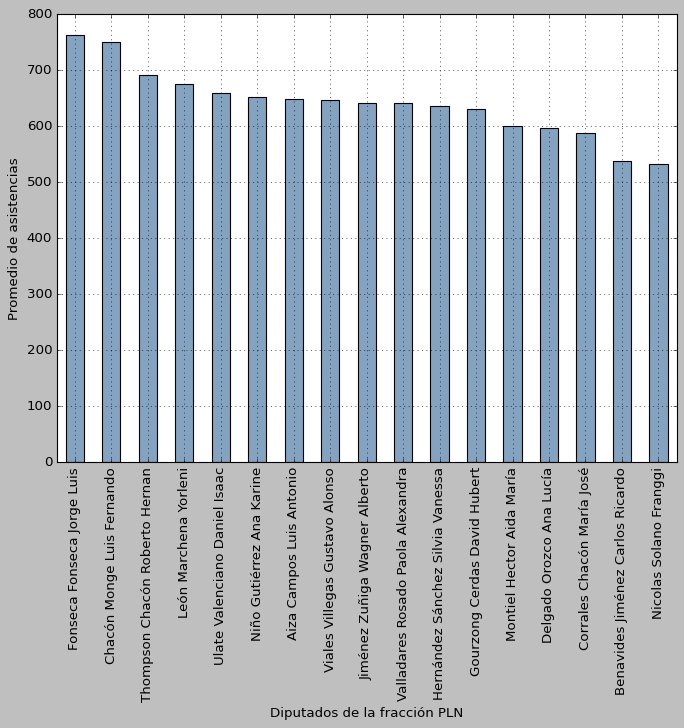

In [ ]:
DiputadosPAC = df[df['Frac']=='PLN'].groupby('Nomb')["Asistencia"].sum()
fig, ax = plt.subplots(figsize=(10,7))
DiputadosPAC.sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.grid(axis='both')
plt.style.use('classic')
plt.xlabel('Diputados de la fracción PLN')
plt.ylabel('Promedio de asistencias')
plt.show()

In [ ]:
df[df['Frac']=='PLN'].groupby('Nomb')["Asistencia"].sum()

Nomb
Aiza Campos Luis Antonio             648
Benavides Jiménez Carlos Ricardo     538
Chacón Monge Luis Fernando           751
Corrales Chacón María José           588
Delgado Orozco Ana Lucía             597
Fonseca Fonseca Jorge Luis           763
Gourzong Cerdas David Hubert         631
Hernández Sánchez Silvia Vanessa     636
Jiménez Zuñiga Wagner Alberto        642
León Marchena Yorleni                675
Montiel Hector Aida María            601
Nicolas Solano Franggi               532
Niño Gutiérrez Ana Karine            652
Thompson Chacón Roberto Hernan       692
Ulate Valenciano Daniel Isaac        659
Valladares Rosado Paola Alexandra    641
Viales Villegas Gustavo Alonso       646
Name: Asistencia, dtype: int64

In [ ]:
df[df['Frac']=='PLN'].groupby('Nomb')["Total"].sum()


Nomb
Aiza Campos Luis Antonio              883
Benavides Jiménez Carlos Ricardo      886
Chacón Monge Luis Fernando           1015
Corrales Chacón María José            904
Delgado Orozco Ana Lucía              943
Fonseca Fonseca Jorge Luis           1049
Gourzong Cerdas David Hubert          900
Hernández Sánchez Silvia Vanessa      955
Jiménez Zuñiga Wagner Alberto         907
León Marchena Yorleni                 964
Montiel Hector Aida María             873
Nicolas Solano Franggi                939
Niño Gutiérrez Ana Karine             963
Thompson Chacón Roberto Hernan        973
Ulate Valenciano Daniel Isaac         929
Valladares Rosado Paola Alexandra     960
Viales Villegas Gustavo Alonso        956
Name: Total, dtype: int64

In [ ]:
df[df['Frac']=='PLN'].groupby('Nomb')["Asistencia"].mean()

Nomb
Aiza Campos Luis Antonio             24.923077
Benavides Jiménez Carlos Ricardo     20.692308
Chacón Monge Luis Fernando           28.884615
Corrales Chacón María José           22.615385
Delgado Orozco Ana Lucía             22.961538
Fonseca Fonseca Jorge Luis           29.346154
Gourzong Cerdas David Hubert         24.269231
Hernández Sánchez Silvia Vanessa     24.461538
Jiménez Zuñiga Wagner Alberto        24.692308
León Marchena Yorleni                25.961538
Montiel Hector Aida María            23.115385
Nicolas Solano Franggi               20.461538
Niño Gutiérrez Ana Karine            25.076923
Thompson Chacón Roberto Hernan       26.615385
Ulate Valenciano Daniel Isaac        25.346154
Valladares Rosado Paola Alexandra    24.653846
Viales Villegas Gustavo Alonso       24.846154
Name: Asistencia, dtype: float64

### Visualizacion de asistencia de PRN

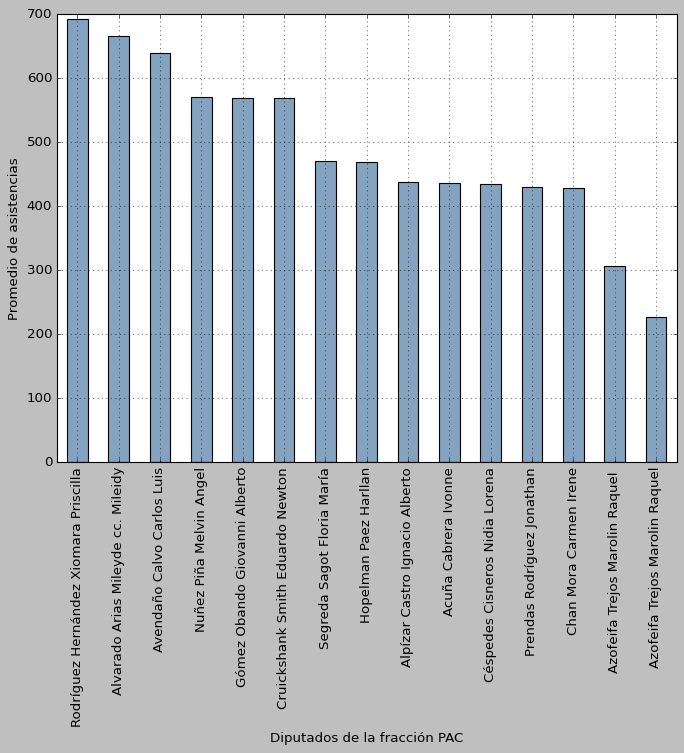

In [ ]:
DiputadosPAC = df[df['Frac']=='PRN'].groupby('Nomb')["Asistencia"].sum()
fig, ax = plt.subplots(figsize=(10,7))
DiputadosPAC.sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.grid(axis='both')
plt.style.use('classic')
plt.xlabel('Diputados de la fracción PAC')
plt.ylabel('Promedio de asistencias')
plt.show()

In [ ]:
 DiputadosPRN = df[df['Frac']=='PRN'].groupby('Nomb')["Asistencia"].mean()
 DiputadosPRN.sort_values(ascending=False)

Nomb
Rodríguez Hernández Xiomara Priscilla    26.653846
Alvarado Arias Mileyde cc. Mileidy       25.615385
Azofeifa Trejos Marolin Raquel           25.500000
Azofeifa Trejos Marolin Raquel           25.222222
Avendaño Calvo Carlos Luis               24.576923
Segreda Sagot Floria María               22.380952
Hopelman Paez Harllan                    22.333333
Nuñez Piña Melvin Angel                  21.923077
Gómez Obando Giovanni Alberto            21.884615
Cruickshank Smith Eduardo Newton         21.884615
Alpízar Castro Ignacio Alberto           20.857143
Acuña Cabrera Ivonne                     20.809524
Céspedes Cisneros Nidia Lorena           20.666667
Prendas Rodríguez Jonathan               20.476190
Chan Mora Carmen Irene                   20.380952
Name: Asistencia, dtype: float64

In [ ]:
 DiputadosPRN = df[df['Frac']=='PRN'].groupby('Nomb')["Asistencia"].sum()
 DiputadosPRN.sort_values(ascending=False)

Nomb
Rodríguez Hernández Xiomara Priscilla    693
Alvarado Arias Mileyde cc. Mileidy       666
Avendaño Calvo Carlos Luis               639
Nuñez Piña Melvin Angel                  570
Gómez Obando Giovanni Alberto            569
Cruickshank Smith Eduardo Newton         569
Segreda Sagot Floria María               470
Hopelman Paez Harllan                    469
Alpízar Castro Ignacio Alberto           438
Acuña Cabrera Ivonne                     437
Céspedes Cisneros Nidia Lorena           434
Prendas Rodríguez Jonathan               430
Chan Mora Carmen Irene                   428
Azofeifa Trejos Marolin Raquel           306
Azofeifa Trejos Marolin Raquel           227
Name: Asistencia, dtype: int64

In [ ]:
 DiputadosPRN = df[df['Frac']=='PRN'].groupby('Nomb')["Total"].sum()
 DiputadosPRN.sort_values(ascending=False)

Nomb
Avendaño Calvo Carlos Luis               971
Rodríguez Hernández Xiomara Priscilla    968
Alvarado Arias Mileyde cc. Mileidy       954
Cruickshank Smith Eduardo Newton         945
Gómez Obando Giovanni Alberto            921
Nuñez Piña Melvin Angel                  858
Segreda Sagot Floria María               757
Hopelman Paez Harllan                    731
Acuña Cabrera Ivonne                     692
Prendas Rodríguez Jonathan               672
Céspedes Cisneros Nidia Lorena           663
Chan Mora Carmen Irene                   663
Alpízar Castro Ignacio Alberto           632
Azofeifa Trejos Marolin Raquel           479
Azofeifa Trejos Marolin Raquel           302
Name: Total, dtype: int64